In [2]:
import pandas as pd

#File path to the csv file
csv_file = "pp-2018-part2.csv"

# Read csv file into dataframe
df = pd.read_csv(csv_file, names = ["TID","Price","Sale Date", "Postcode",
                                    "Property Type","New Build","Tenure",
                                    "PAON","SAON","Street","Locality",
                                    "Town/City","District","County",
                                    "PPD Category","Record Status"],
                            parse_dates= ["Sale Date"])

# Print first 5 rows in the dataframe
df.head()

,TID,Price,Sale Date,Postcode,Property Type,New Build,Tenure,PAON,SAON,Street,Locality,Town/City,District,County,PPD Category,Record Status
0,{773788C3-132C-2CE4-E053-6C04A8C05E57},274995,2018-06-29,DE14 3FY,D,Y,F,43,NaN,ROWAN DRIVE,BRANSTON,BURTON-ON-TRENT,EAST STAFFORDSHIRE,STAFFORDSHIRE,A,A
1,{773788C3-132D-2CE4-E053-6C04A8C05E57},238500,2018-06-29,ST15 0FF,D,Y,F,54,NaN,BLUNDELL DRIVE,NaN,STONE,STAFFORD,STAFFORDSHIRE,A,A
2,{773788C3-132F-2CE4-E053-6C04A8C05E57},357000,2018-06-27,WS13 8FT,D,Y,F,23,NaN,YOXALL WAY,STREETHAY,LICHFIELD,LICHFIELD,STAFFORDSHIRE,A,A
3,{773788C3-15EF-2CE4-E053-6C04A8C05E57},425000,2018-08-14,SM4 6SL,T,N,F,264,NaN,GREEN LANE,NaN,MORDEN,SUTTON,GREATER LONDON,A,A
4,{773788C3-15F0-2CE4-E053-6C04A8C05E57},1365000,2018-09-05,CR2 0RH,D,N,F,111,NaN,PURLEY DOWNS ROAD,NaN,SOUTH CROYDON,CROYDON,GREATER LONDON,A,A


In [12]:
PropertyType = df['District']
PropertyType

3            SUTTON
5            SUTTON
6          LEWISHAM
7            MERTON
8           CROYDON
            ...    
504662     DAVENTRY
504702    BASSETLAW
504717       BARNET
504724    DONCASTER
504744     LEWISHAM
Name: District, Length: 54462, dtype: object

In [13]:
rekap = {}
for row in PropertyType:
    if row in rekap:
        rekap[row] += 1
    else:
        rekap[row] = 1
        
rekap

{'SUTTON': 141,
 'LEWISHAM': 247,
 'MERTON': 144,
 'CROYDON': 242,
 'RICHMOND UPON THAMES': 226,
 'BROMLEY': 411,
 'LAMBETH': 197,
 'KINGSTON UPON THAMES': 115,
 'SOUTHWARK': 278,
 'WANDSWORTH': 370,
 'GREENWICH': 258,
 'GREAT YARMOUTH': 160,
 'SOUTH NORFOLK': 228,
 'BRECKLAND': 209,
 'NORWICH': 244,
 'NORTH NORFOLK': 214,
 'BROADLAND': 227,
 'KETTERING': 169,
 'EAST NORTHAMPTONSHIRE': 143,
 'WELLINGBOROUGH': 160,
 'NORTHAMPTON': 324,
 'DAVENTRY': 139,
 'SOUTH NORTHAMPTONSHIRE': 153,
 'ENFIELD': 205,
 'BARNET': 318,
 'HOUNSLOW': 158,
 'EALING': 189,
 'HARINGEY': 170,
 'NORTHUMBERLAND': 473,
 'CAMDEN': 173,
 'HARROW': 184,
 'HAVERING': 225,
 'HACKNEY': 159,
 'ISLINGTON': 143,
 'TOWER HAMLETS': 237,
 'BRENT': 147,
 'CITY OF WESTMINSTER': 175,
 'HILLINGDON': 255,
 'GEDLING': 177,
 'RUSHCLIFFE': 173,
 'MANSFIELD': 148,
 'BROXTOWE': 167,
 'CITY OF NOTTINGHAM': 333,
 'ASHFIELD': 162,
 'BASSETLAW': 180,
 'NEWARK AND SHERWOOD': 186,
 "KING'S LYNN AND WEST NORFOLK": 255,
 'SELBY': 149,
 'RYEDAL

In [26]:
newRekap = {'others' : 0}
for key in rekap:
    if rekap[key] <= 400:
        newRekap['others'] += rekap[key]
    else:
        newRekap[key] = rekap[key]

In [27]:
newRekap

{'others': 48363,
 'BROMLEY': 411,
 'NORTHUMBERLAND': 473,
 'MANCHESTER': 516,
 'LIVERPOOL': 563,
 'BIRMINGHAM': 792,
 'LEEDS': 837,
 'EAST RIDING OF YORKSHIRE': 453,
 'WILTSHIRE': 501,
 'BRADFORD': 558,
 'KIRKLEES': 433,
 'COUNTY DURHAM': 562}

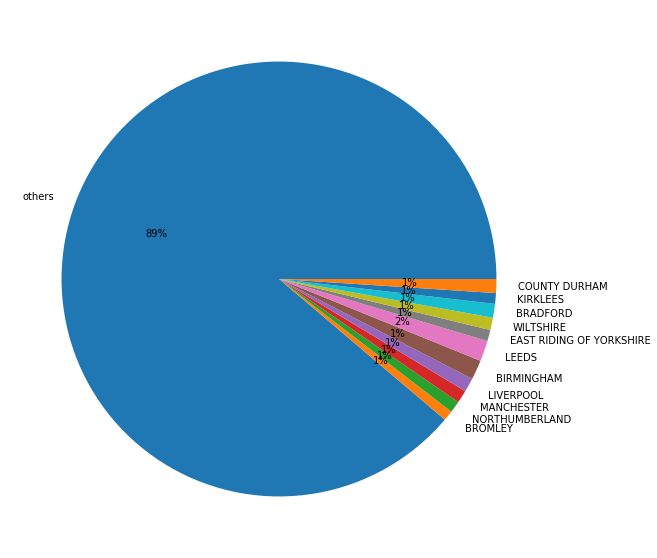

In [28]:
plt.pie(newRekap.values(), autopct="%1.0f%%", labels=newRekap)
plt.show()

In [3]:
#Pilih hanya rekam tipe A dan tipe properti bukan "O"
df = df.loc[df['Record Status'] == 'A']
df = df.loc[df['Property Type'] != 'O']

# Select transactions for August 2018
df = df[(df["Sale Date"].dt.year==2018) & (df["Sale Date"].dt.month==8)]

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

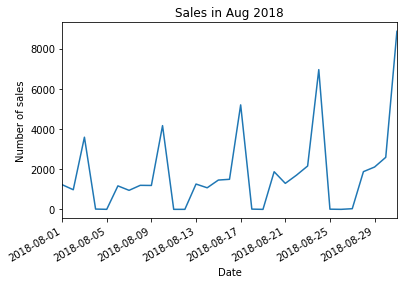

In [5]:
# Volume penjualan harian untuk Agustus 2018
daily_sales_vol = df["Sale Date"].value_counts()
daily_sales_vol.plot()
plt.title('Sales in Aug 2018')
plt.ylabel('Number of sales')
plt.xlabel('Date')
plt.rcParams['figure.figsize'] = (20.0, 10.0)

Text(0.5, 0, 'Date')

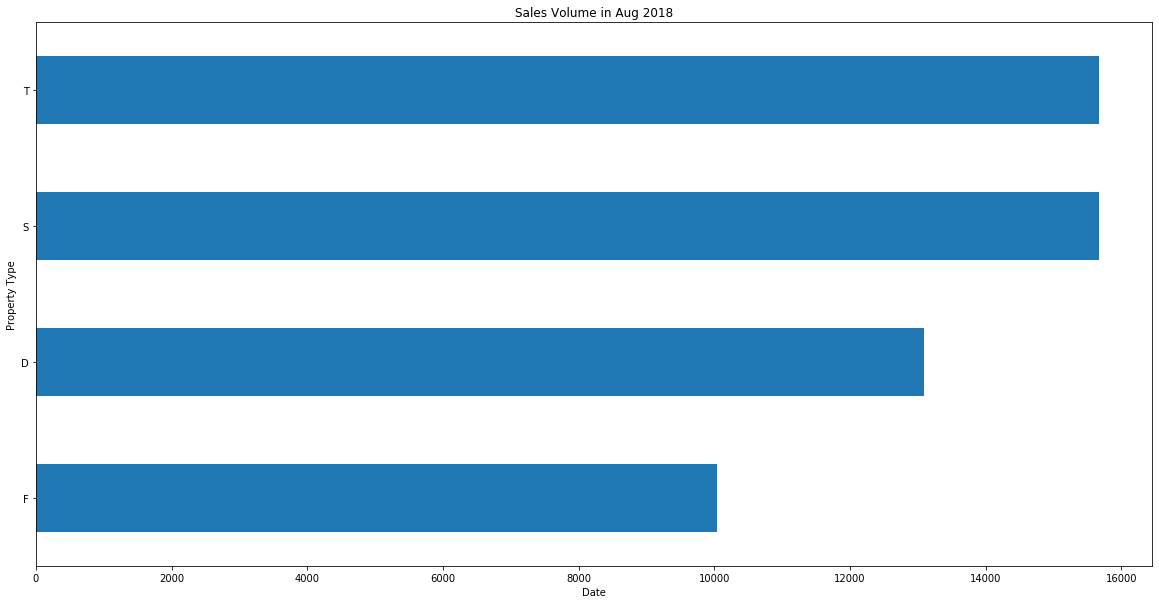

In [6]:
# Jumlah transaksi properti residensial pada Agustus 2018 berdasarkan jenis properti
sales_by_type = df["Property Type"].value_counts()
sales_by_type.sort_values().plot(kind='barh')
plt.title('Sales Volume in Aug 2018')
plt.ylabel('Property Type')
plt.xlabel('Date')

Text(0.5, 0, 'Date')

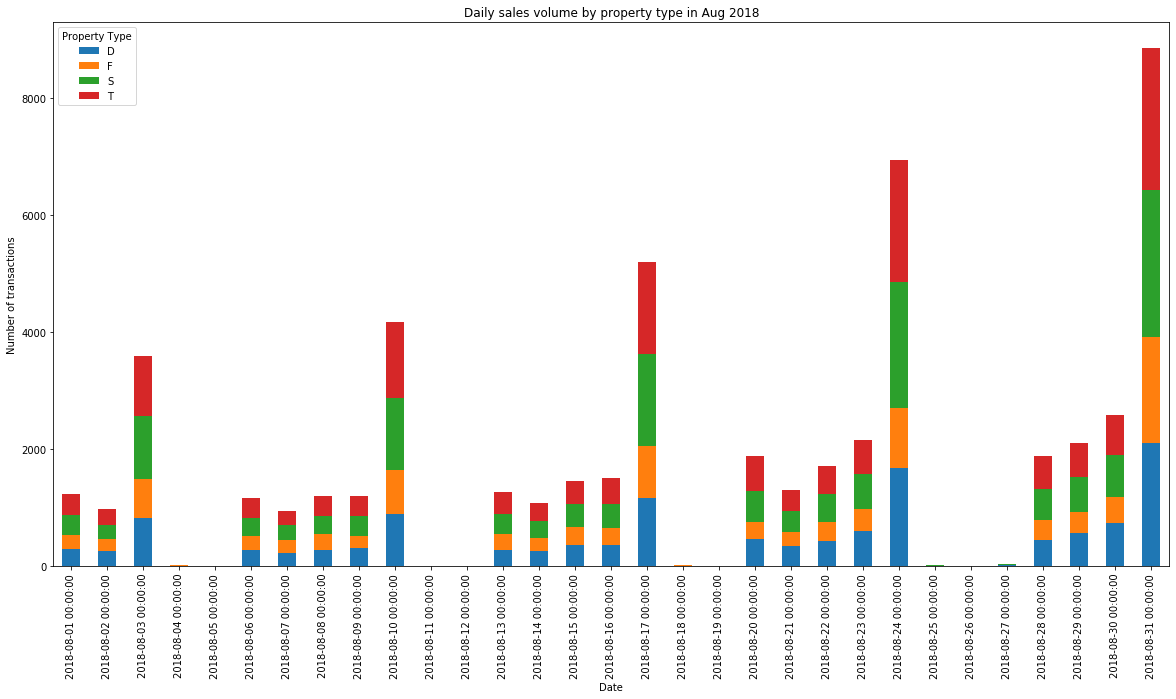

In [7]:
# Volume penjualan harian berdasarkan jenis properti
df.groupby(['Sale Date','Property Type']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Daily sales volume by property type in Aug 2018')
plt.ylabel('Number of transactions')
plt.xlabel('Date')

Text(0.5, 0, 'Property Type')

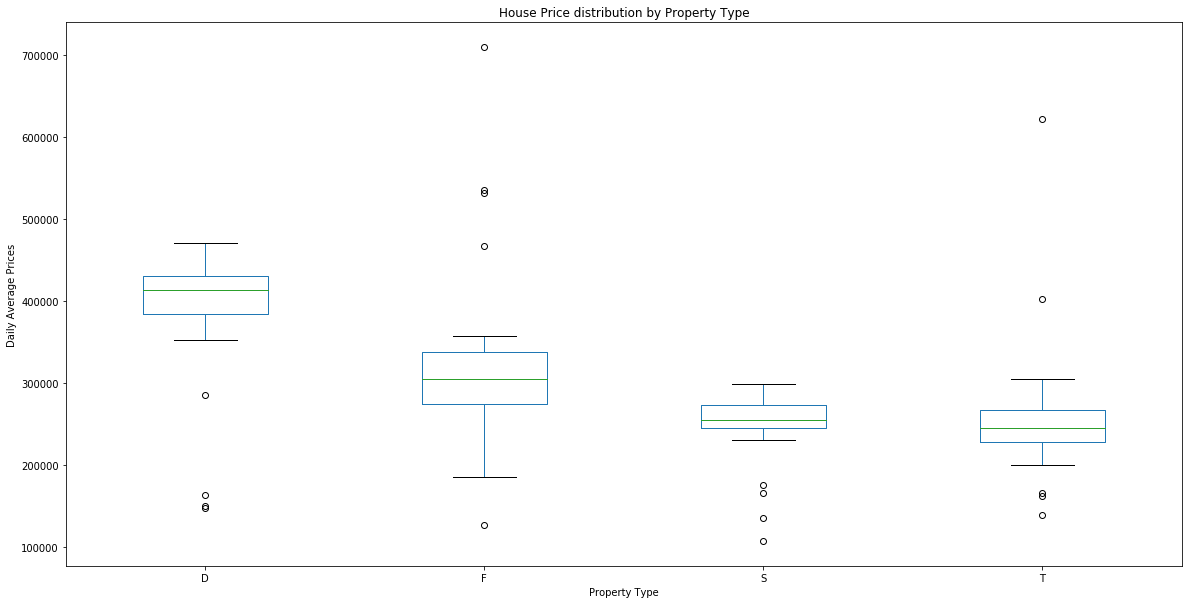

In [8]:
# Distribusi harga box plot
df.groupby(['Sale Date', 'Property Type'])['Price'].mean().unstack().plot(kind="box")
plt.title('House Price distribution by Property Type')
plt.ylabel('Daily Average Prices')
plt.xlabel('Property Type')

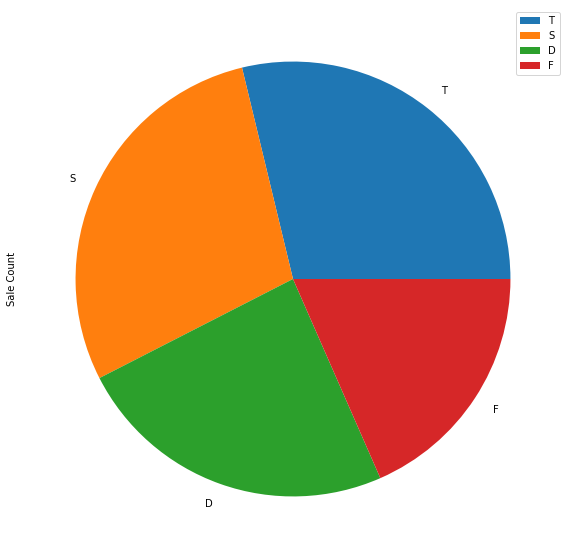

In [9]:
#Pie Chart
sale_volume = pd.DataFrame(df['Property Type'].value_counts())
sale_volume.columns=['Sale Count']
sale_volume.plot(kind='pie', y='Sale Count')